In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

# 0.Data Load
---

In [4]:
df_cust = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv")
df_pdde = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv", low_memory=False)

# 1.One Hot Encoding in CUSTOMER
---

In [5]:
df_cust

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


## 1.1.Gender Encoding
---

In [6]:
# -- ma_fem_dv encoding
df_cust["ma_fem_dv"] = df_cust["ma_fem_dv"].apply(lambda x: 0 if x=="남성" else 1)
df_cust.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,1,40대,Z07
1,M000059535,1,30대,Z12
2,M000136117,1,30대,Z11
3,M000201112,1,50대,Z17
4,M000225114,1,40대,Z17


## 1.2.ETC Encoding
---

In [7]:
target = ["ages", "zon_hlv"]
df_cust_ohe = pd.concat([df_cust[["cust", "ma_fem_dv"]], pd.get_dummies(df_cust[target], drop_first=True)], axis=1)
df_cust_ohe

,cust,ma_fem_dv,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,zon_hlv_Z02,zon_hlv_Z03,zon_hlv_Z04,...,zon_hlv_Z08,zon_hlv_Z09,zon_hlv_Z10,zon_hlv_Z11,zon_hlv_Z12,zon_hlv_Z13,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17
0,M000034966,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M000059535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,M000136117,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,M000201112,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M000225114,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29909,M999770689,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29910,M999849895,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29911,M999926092,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
import copy
def cust_encoding(df, opt_gender=True, opt_etc=True):
    df_result = copy.deepcopy(df)
    
    # -- 1. gender
    if opt_gender:
        df_result["ma_fem_dv"] = df_result["ma_fem_dv"].apply(lambda x: 0 if x=="남성" else 1)
    
    # -- 2. ETC
    if opt_etc:
        target = ["ages", "zon_hlv"]
        df_result = pd.concat([df_result[["cust", "ma_fem_dv"]], pd.get_dummies(df_result[target], drop_first=True)], axis=1)
    
    return df_result

# 2.Make Variables in PDDE
---

In [8]:
df_pdde.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


**파생 변수를 생성할 수 있는 변수**

1. `chnl_dv`:   채널은 binary -> on/off/on&off 가 있고, 이를 on / only off 로 분리 가능
2. `buy_am` :   금액 단위 구간화 (ex: A, B, C 구간)
3. `de_dt`  :   구매 주기 구간화
4. `de_dt`  :   주중과 주말 고객 분리
5. `cop_c`  :   이용한 유통사

In [9]:
def encode_concat(df, col_name, key, merge_target_df=None, drop=False, pre_fix=None):
    if pre_fix is None:
            dummy_df = pd.get_dummies(df[col_name], drop_first=drop, prefix=col_name, prefix_sep="_")
    else:
        dummy_df = pd.get_dummies(df[col_name], drop_first=drop, prefix=pre_fix, prefix_sep="_")
    if merge_target_df is None:
        return pd.concat([df[key], dummy_df], axis=1)
    else:
        return merge_target_df.merge(pd.concat([df[key], dummy_df], axis=1), on=key, how="left")

## 2.1.chnl_dv
---

In [10]:
def check_on_off(x):
    if len(x)>1:
        return "onf"
    else:
        if x[0]==1:
            return "off"
        else:
            return "on"

df_chnl_3c = df_pdde.groupby("cust")["chnl_dv"].apply(lambda x: list(set(x))).apply(check_on_off).reset_index()
df_ohe = pd.concat([df_chnl_3c["cust"], pd.get_dummies(df_chnl_3c["chnl_dv"], drop_first=True)], axis=1)
df_ohe = df_ohe.merge(df_cust_ohe, how="left", on="cust")
df_ohe

,cust,on,onf,ma_fem_dv,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,zon_hlv_Z02,...,zon_hlv_Z08,zon_hlv_Z09,zon_hlv_Z10,zon_hlv_Z11,zon_hlv_Z12,zon_hlv_Z13,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17
0,M000034966,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M000136117,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,M000201112,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,M000225114,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M000261625,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26913,M999673157,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
26914,M999770689,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26915,M999849895,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2.buy_am 구간화
---

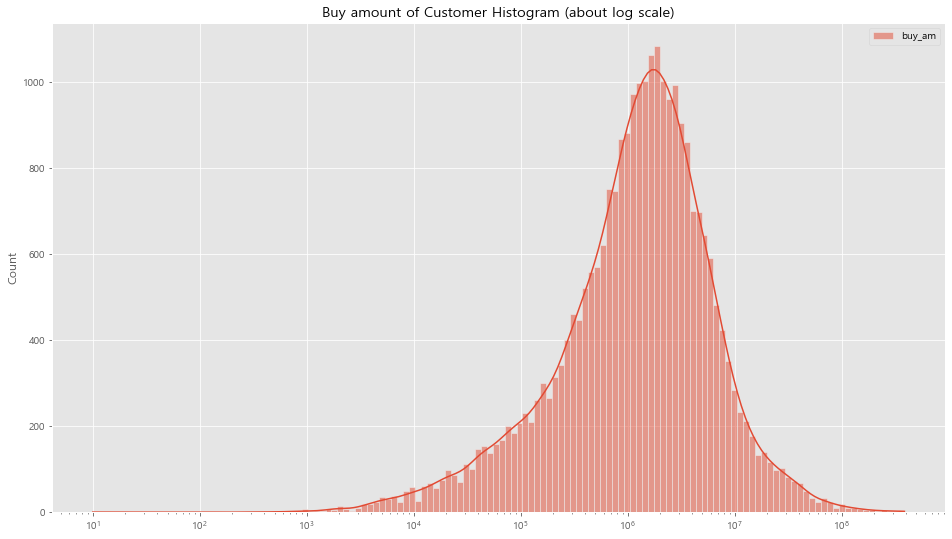

In [11]:
sns.histplot(df_pdde.groupby(["cust"], as_index=False)["buy_am"].sum(), kde=True, alpha=0.5, log_scale=True)
plt.title("Buy amount of Customer Histogram (about log scale)")
plt.show()

In [12]:
df_buy_am = df_pdde.groupby(["cust"], as_index=False)["buy_am"].sum()
df_buy_am.head()

,cust,buy_am
0,M000034966,654120.0
1,M000136117,27373630.0
2,M000201112,53120.0
3,M000225114,1937700.0
4,M000261625,6052700.0


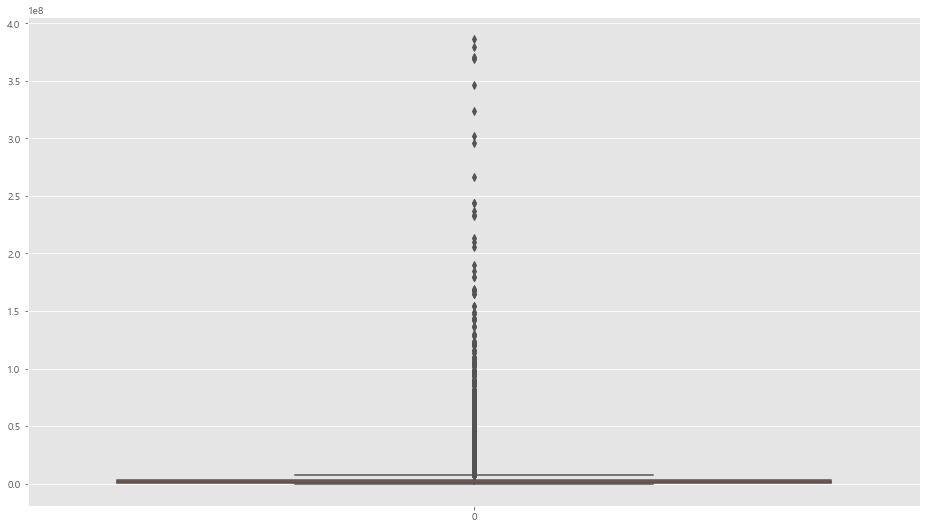

In [13]:
sns.boxplot(data = df_buy_am["buy_am"])
plt.show()

In [14]:
np.quantile(df_buy_am["buy_am"], [.25, .5, .75])

array([ 479730., 1405659., 3323329.])

In [15]:
def classification_buy_am(x, std_points):
    if x <= std_points[0]:
        return "D"
    elif std_points[0] < x <= std_points[1]:
        return "C"
    elif std_points[1] < x <= std_points[2]:
        return "B"
    else:
        return "A"

df_buy_am["am_class"] = df_buy_am["buy_am"].apply(classification_buy_am, std_points=np.quantile(df_buy_am["buy_am"], [.25, .5, .75]))
df_buy_am

,cust,buy_am,am_class
0,M000034966,654120.0,C
1,M000136117,27373630.0,A
2,M000201112,53120.0,D
3,M000225114,1937700.0,B
4,M000261625,6052700.0,A
...,...,...,...
26912,M999599111,1484022.0,B
26913,M999673157,2851370.0,B
26914,M999770689,1187140.0,C
26915,M999849895,1103792.0,C


In [65]:
df_buy_am.head()

,cust,buy_am,am_class
0,M000034966,654120.0,C
1,M000136117,27373630.0,A
2,M000201112,53120.0,D
3,M000225114,1937700.0,B
4,M000261625,6052700.0,A


In [66]:
# df_buy_am.to_csv("../buy_am_class.csv", index=False)

In [16]:
df_buy_am["am_class"].value_counts()

D    6730
C    6729
A    6729
B    6729
Name: am_class, dtype: int64

In [17]:
df_ohe = encode_concat(df=df_buy_am, col_name="am_class", merge_target_df=df_ohe, key="cust", drop=True)

## 2.3.구매 주기 구간화 (de_dt)
---

In [18]:
from datetime import datetime
def make_ts_column(df, date="de_dt", hour="de_hr", drop=False):
    
    if df[date].dtypes=="str" and df[hour].dtypes=="int64":
        df["de_dthr"]=pd.to_datetime(df[date]+":"+df[hour].apply(str), format="%Y-%m-%d:%H")
    elif df[date].dtypes=="<M8[ns]" and df[hour].dtypes=="int64":
        df["de_dthr"]=pd.to_datetime(df[date].apply(lambda x: datetime.strftime(x, format="%Y-%m-%d"))+":"+df[hour].apply(str),format="%Y-%m-%d:%H")
    elif df[date].dtypes=="int64" and df[hour].dtypes=="int64":
        df["de_dthr"]=pd.to_datetime(df[date].apply(str)+":"+df[hour].apply(str),format="%Y%m%d:%H")
    else:
        # assert df[date].dtypes!="str" or df[date].dtypes!="<M8[ns]", "date must be 'str' or '<M8[ns]' type"
        # assert df[hour].dtypes!="int", "hour must be 'int' type"
        raise TypeError("Check args type -> date must be 'str' or '<M8[ns]' type. hour must be 'int' type.") 
    
    if drop:
        return df.drop(["de_dt", "de_hr"], axis=1)
    else:
        return df

make_ts_column(df_pdde)

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,de_dthr
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,2021-01-01 10:00:00
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,2021-01-01 10:00:00
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,2021-01-01 10:00:00
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,2021-01-01 10:00:00
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,2021-01-01 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,2021-12-31 23:00:00
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,2021-12-31 23:00:00
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,2021-12-31 23:00:00
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,2021-12-31 23:00:00


In [19]:
df_ts = make_ts_column(df_pdde)[["cust","rct_no","de_dthr"]]
df_ts

,cust,rct_no,de_dthr
0,M430112881,A01000001113,2021-01-01 10:00:00
1,M646853852,A01000002265,2021-01-01 10:00:00
2,M430112881,A01000003148,2021-01-01 10:00:00
3,M430112881,A01000003148,2021-01-01 10:00:00
4,M430112881,A01000004946,2021-01-01 10:00:00
...,...,...,...
4381738,M533286446,E06052119978,2021-12-31 23:00:00
4381739,M533286446,E06052119978,2021-12-31 23:00:00
4381740,M533286446,E06052119978,2021-12-31 23:00:00
4381741,M533286446,E06052119978,2021-12-31 23:00:00


In [20]:
df_ts.drop_duplicates().sort_values(by="cust")

,cust,rct_no,de_dthr
4180399,M000034966,A04081271994,2021-08-29 15:00:00
3023036,M000034966,A02359647751,2021-12-23 19:00:00
3023028,M000034966,A02359645028,2021-12-23 19:00:00
24115,M000034966,A01016718167,2021-01-16 18:00:00
3990606,M000034966,A04003723283,2021-01-16 21:00:00
...,...,...,...
229832,M999962961,A01163820680,2021-05-04 16:00:00
3655098,M999962961,A03072800697,2021-08-06 10:00:00
236440,M999962961,A01168593608,2021-05-07 14:00:00
3513994,M999962961,A03072485969,2021-06-14 17:00:00


In [21]:
temp = df_ts.drop_duplicates()
temp2 = temp.groupby("cust")["de_dthr"].apply(lambda x: list(set(x))).apply(sorted)

In [22]:
cust_visit_dict = dict()
for cust in temp2.index:
    pre_visit = None
    cust_visit_dict[cust] = np.mean([temp2[cust][i]-temp2[cust][i-1] for i in range(1,len(temp2[cust])-1)])

c:\Users\yunjc\anaconda3\envs\main\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yunjc\anaconda3\envs\main\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
df_cust_visit = pd.DataFrame(cust_visit_dict.values(),index=cust_visit_dict.keys(),columns=["freq_mean"])
df_cust_visit

,freq_mean
M000034966,40 days 23:40:00
M000136117,8 days 14:34:30
M000201112,41 days 23:20:00
M000225114,6 days 18:25:42.857142857
M000261625,11 days 13:51:43.448275862
...,...
M999599111,52 days 22:36:00
M999673157,25 days 19:55:00
M999770689,2 days 22:07:26.017699115
M999849895,10 days 03:04:48


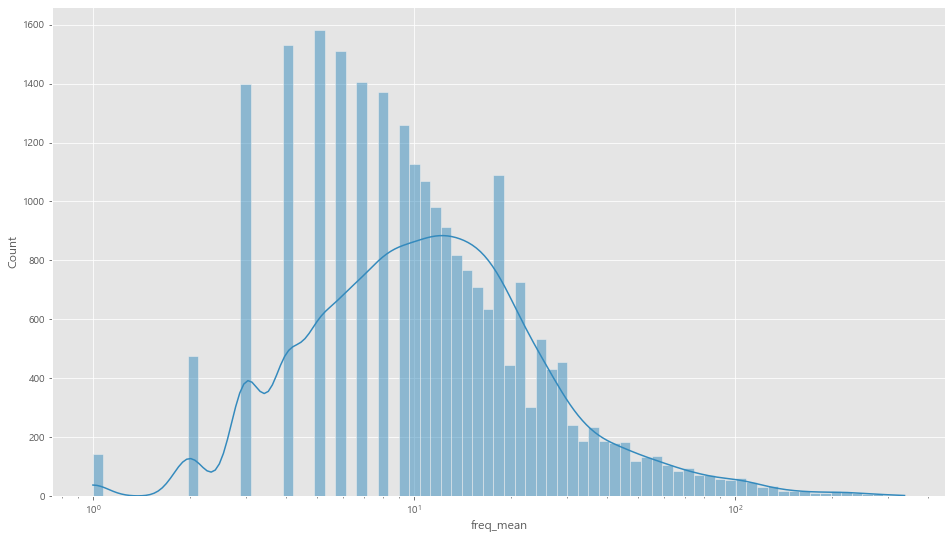

In [24]:
df_cust_visit["freq_mean"].dt.days.dropna().apply(lambda x: x+1)
sns.histplot(df_cust_visit["freq_mean"].dt.days.dropna().apply(lambda x: x+1), kde=True, log_scale=True)
plt.show()

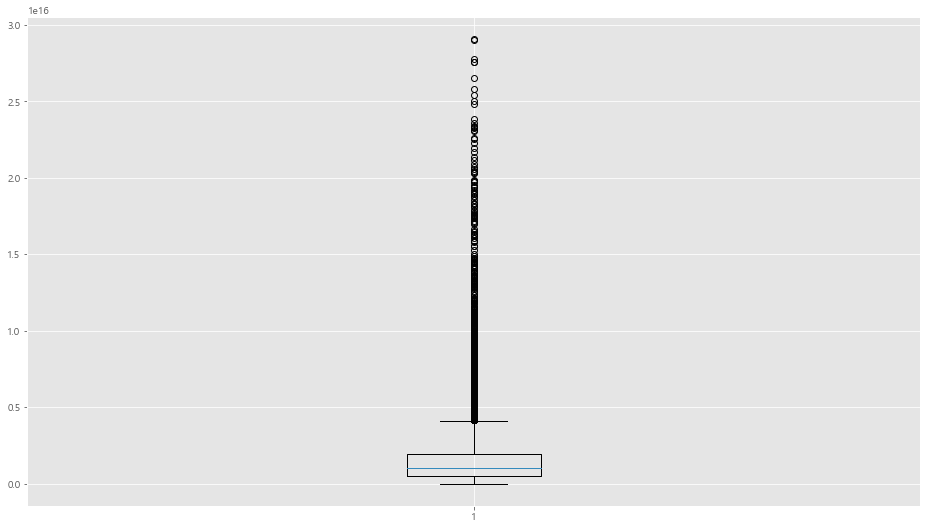

In [25]:
plt.boxplot(df_cust_visit["freq_mean"])
plt.show()

In [26]:
np.quantile(df_cust_visit["freq_mean"],[.25, .5, .75])

array([ 523028571428571, 1003200000000000, 1964400000000000],
      dtype='timedelta64[ns]')

In [27]:
"""
class에 대한 정리

    A:  평균 구매 주기가 긴 클래스
    B:  평균 구매 주기가 약간 긴 클래스
    C:  평균 구매 주기가 약간 짧은 클래스
    D:  평균 구매 주기가 짧은 클래스
    
"""
df_cust_visit["freq_class"] = df_cust_visit["freq_mean"].apply(classification_buy_am, std_points=np.quantile(df_cust_visit["freq_mean"], [.25, .5, .75]))
df_cust_visit.reset_index(inplace=True)
df_cust_visit.rename({"index":"cust"}, axis=1, inplace=True)

In [28]:
df_ohe = encode_concat(df=df_cust_visit, col_name="freq_class", merge_target_df=df_ohe, key="cust", drop=True)

## 2.4.주중/주말 고객 분리 (de_dt)
---

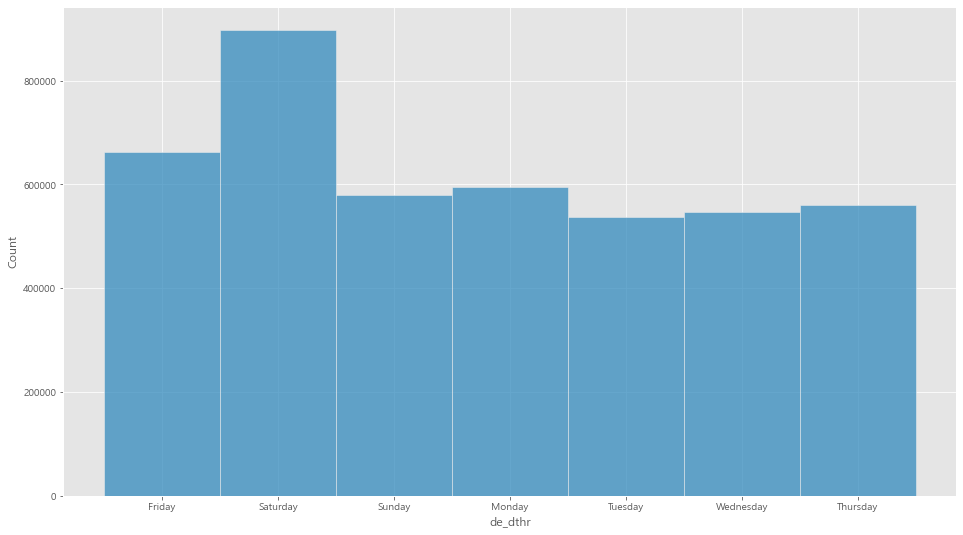

In [29]:
sns.histplot(df_ts["de_dthr"].dt.day_name())
plt.show()

In [30]:
df_ts["week"] = df_ts.loc[:,"de_dthr"].dt.day_name().values
pd.pivot_table(data=df_ts,
               index="cust",
               columns="week",
               values="rct_no",
               aggfunc="count",
               fill_value=0)

C:\Users\yunjc\AppData\Local\Temp\ipykernel_16408\2328325117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["week"] = df_ts.loc[:,"de_dthr"].dt.day_name().values


week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
cust,,,,,,,
M000034966,0,0,6,29,15,1,0
M000136117,19,20,22,9,28,9,2
M000201112,9,0,0,12,0,0,0
M000225114,8,2,22,9,22,63,33
M000261625,16,6,26,4,0,15,0
...,...,...,...,...,...,...,...
M999599111,0,0,1,4,0,0,29
M999673157,0,3,8,1,9,2,1
M999770689,52,57,37,23,68,36,42


In [31]:
df_pdde["week"] = df_pdde["de_dthr"].dt.day_name()
df_pdde.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,de_dthr,week
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,2021-01-01 10:00:00,Friday
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,2021-01-01 10:00:00,Friday
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,2021-01-01 10:00:00,Friday
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,2021-01-01 10:00:00,Friday
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,2021-01-01 10:00:00,Friday


In [32]:
df_week_am = pd.pivot_table(data=df_pdde,
               index="cust",
               columns="week",
               values="buy_am",
               aggfunc="sum",
               fill_value=0).reset_index()
df_week_am

week,cust,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,M000034966,0,0,152200,255020,181200,65700,0
1,M000136117,12896000,1283770,2043610,2295000,3211250,5206000,438000
2,M000201112,14420,0,0,38700,0,0,0
3,M000225114,94500,14500,332750,62650,94650,757470,581180
4,M000261625,2183200,899100,1748200,469800,0,752400,0
...,...,...,...,...,...,...,...,...
26912,M999599111,0,0,9000,40000,0,0,1435022
26913,M999673157,0,591600,1747800,4500,433370,29100,45000
26914,M999770689,147770,194250,177750,63310,142660,257320,204080
26915,M999849895,204000,0,109152,0,541750,99300,149590


In [33]:
weekend_am = df_week_am["Friday"]+df_week_am["Friday"]+df_week_am["Sunday"]
week_am = df_week_am["Monday"]+df_week_am["Tuesday"]+df_week_am["Wednesday"]+df_week_am["Thursday"]
df_week_bin = pd.DataFrame()
df_week_bin["cust"] = df_week_am["cust"]
df_week_bin["weekend_am"] = weekend_am
df_week_bin["week_am"] = week_am
df_week_bin

,cust,weekend_am,week_am
0,M000034966,255020,246900
1,M000136117,28087000,10139020
2,M000201112,67540,0
3,M000225114,251650,1447800
4,M000261625,4836200,1651500
...,...,...,...
26912,M999599111,40000,1435022
26913,M999673157,4500,1099070
26914,M999770689,358850,798310
26915,M999849895,408000,790640


In [34]:
df_ohe["week_bin"] = (df_week_bin["weekend_am"] > df_week_bin["week_am"]).apply(lambda x: 1 if x else 0)

In [35]:
df_ohe

,cust,on,onf,ma_fem_dv,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,zon_hlv_Z02,...,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17,am_class_B,am_class_C,am_class_D,freq_class_B,freq_class_C,freq_class_D,week_bin
0,M000034966,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,M000136117,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,M000201112,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,M000225114,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,M000261625,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26913,M999673157,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26914,M999770689,0,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
26915,M999849895,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 2.5.cop_u : 이용한 유통사
---

In [38]:
df_cop = df_pdde[["cust","rct_no","cop_c"]].drop_duplicates()

In [41]:
df_cop_pt = pd.pivot_table(data=df_cop,
               index="cust",
               columns="cop_c",
               values="rct_no",
               aggfunc="count",
               fill_value=0)
df_cop_pt.reset_index(inplace=True)

In [42]:
df_cop_pt

cop_c,cust,A01,A02,A03,A04,A05,A06
0,M000034966,2,8,0,2,0,0
1,M000136117,62,3,0,0,0,5
2,M000201112,0,0,0,5,0,0
3,M000225114,77,0,1,0,0,0
4,M000261625,48,0,0,0,0,0
...,...,...,...,...,...,...,...
26912,M999599111,1,3,0,3,0,1
26913,M999673157,10,0,0,7,0,0
26914,M999770689,22,32,9,59,0,0
26915,M999849895,22,9,0,3,0,0


In [53]:
df_ohe = df_ohe.merge(pd.concat([df_cop_pt["cust"], (df_cop_pt.iloc[:,1:]!=0).astype(int)], axis=1), on="cust", how="left")
df_ohe

,cust,on,onf,ma_fem_dv,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,zon_hlv_Z02,...,freq_class_B,freq_class_C,freq_class_D,week_bin,A01,A02,A03,A04,A05,A06
0,M000034966,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
1,M000136117,0,1,1,1,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,1
2,M000201112,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,M000225114,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,M000261625,0,0,1,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
26913,M999673157,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
26914,M999770689,0,1,1,1,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,0
26915,M999849895,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


# 3.계층 군집화 - 자카드 유사도
---

## 3.1.DBSCAN을 활용한 이상치 탐지
---

In [82]:
from scipy.spatial.distance import cdist

dist_mat = cdist(df_ohe.iloc[:,1:], df_ohe.iloc[:,1:], metric="jaccard")

In [83]:
pd.DataFrame(dist_mat, index=df_ohe["cust"], columns=df_ohe["cust"])

cust,M000034966,M000136117,M000201112,M000225114,M000261625,M000350564,M000419293,M000494848,M000504230,M000508243,...,M999340261,M999441814,M999468256,M999492154,M999515910,M999599111,M999673157,M999770689,M999849895,M999962961
cust,,,,,,,,,,,,,,,,,,,,,
M000034966,0.000000,0.692308,0.727273,0.750000,0.600000,0.818182,0.545455,0.642857,0.785714,0.692308,...,1.000000,0.769231,0.727273,0.800000,0.600000,0.583333,0.818182,0.615385,0.500000,0.733333
M000136117,0.692308,0.000000,0.846154,0.769231,0.636364,0.833333,0.692308,0.461538,0.800000,0.714286,...,0.909091,0.785714,0.750000,0.818182,0.750000,0.615385,0.833333,0.642857,0.666667,0.571429
M000201112,0.727273,0.846154,0.000000,0.818182,0.666667,0.900000,0.727273,0.785714,0.846154,0.636364,...,0.875000,0.600000,0.800000,0.750000,0.909091,0.846154,0.900000,0.857143,0.818182,0.692308
M000225114,0.750000,0.769231,0.818182,0.000000,0.375000,0.800000,0.500000,0.800000,0.666667,0.666667,...,1.000000,0.750000,0.818182,0.777778,0.818182,0.666667,0.800000,0.785714,0.727273,0.714286
M000261625,0.600000,0.636364,0.666667,0.375000,0.000000,0.777778,0.444444,0.785714,0.846154,0.636364,...,1.000000,0.727273,0.800000,0.750000,0.666667,0.750000,0.900000,0.857143,0.700000,0.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M999599111,0.583333,0.615385,0.846154,0.666667,0.750000,0.833333,0.583333,0.571429,0.714286,0.714286,...,1.000000,0.866667,0.750000,0.818182,0.750000,0.000000,0.727273,0.642857,0.545455,0.666667
M999673157,0.818182,0.833333,0.900000,0.800000,0.900000,0.750000,0.818182,0.666667,0.600000,0.833333,...,1.000000,0.916667,0.900000,0.714286,0.900000,0.727273,0.000000,0.750000,0.800000,0.933333
M999770689,0.615385,0.642857,0.857143,0.785714,0.857143,0.846154,0.800000,0.384615,0.642857,0.812500,...,1.000000,0.714286,0.769231,0.833333,0.857143,0.642857,0.750000,0.000000,0.583333,0.600000


In [87]:
np.quantile(dist_mat, [.25, .5, .75])

array([0.66666667, 0.76923077, 0.84615385])

In [98]:
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import DBSCAN

for i in range(20, 4, -2):
    dbscan_model = DBSCAN(eps=i/100, min_samples = 3, metric="jaccard").fit(df_ohe.iloc[:,1:])
    print(f"Epsilon({i/100})\t{sum(dbscan_model.labels_ == -1)}\t{len(list(set(dbscan_model.labels_)))}")

Epsilon(0.2)	2408	111
Epsilon(0.18)	4108	305
Epsilon(0.16)	6175	568
Epsilon(0.14)	9031	863
Epsilon(0.12)	11983	1251
Epsilon(0.1)	14413	1523
Epsilon(0.08)	17384	2003
Epsilon(0.06)	17411	2003


In [117]:
param_eps = .334
dbscan_model = DBSCAN(eps=param_eps, min_samples = 30, metric="jaccard").fit(df_ohe.iloc[:,1:])
print(f"Epsilon({param_eps})\t{sum(dbscan_model.labels_ == -1)}\t{set(dbscan_model.labels_)}")

Epsilon(0.334)	481	{0, -1}


In [121]:
df_dbscan_res = pd.concat([df_ohe["cust"], pd.Series(dbscan_model.labels_)], axis=1).rename({0:"labels"}, axis=1)
df_dbscan_res

,cust,labels
0,M000034966,0
1,M000136117,0
2,M000201112,0
3,M000225114,0
4,M000261625,0
...,...,...
26912,M999599111,0
26913,M999673157,0
26914,M999770689,0
26915,M999849895,0


In [122]:
df_inlier = df_dbscan_res.loc[df_dbscan_res["labels"]==0]
df_inlier

,cust,labels
0,M000034966,0
1,M000136117,0
2,M000201112,0
3,M000225114,0
4,M000261625,0
...,...,...
26912,M999599111,0
26913,M999673157,0
26914,M999770689,0
26915,M999849895,0


In [123]:
df_ohe = pd.merge(df_inlier["cust"], df_ohe, on="cust", how="left")
df_ohe

,cust,on,onf,ma_fem_dv,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,zon_hlv_Z02,...,freq_class_B,freq_class_C,freq_class_D,week_bin,A01,A02,A03,A04,A05,A06
0,M000034966,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
1,M000136117,0,1,1,1,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,1
2,M000201112,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,M000225114,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,M000261625,0,0,1,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,M999599111,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
26432,M999673157,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
26433,M999770689,0,1,1,1,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,0
26434,M999849895,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


## 3.2.이상치 제거 후 계층 군집화
---

In [135]:
from sklearn.cluster import AgglomerativeClustering as AGC

cluster = AGC(n_clusters = 15, affinity="jaccard", linkage="average")
cluster.fit_predict(df_ohe.iloc[:,1:])

array([5, 4, 4, ..., 1, 4, 4], dtype=int64)

In [136]:
df_clust_res = pd.DataFrame()
df_clust_res["cust"] = df_ohe["cust"]
df_clust_res["cluster"] = cluster.labels_
df_clust_res["cluster"].value_counts().apply(lambda x: x*100/len(df_clust_res["cluster"]))

4     77.678166
3     12.679679
12     2.492813
5      2.262067
14     1.096989
1      0.919201
6      0.858678
0      0.798154
2      0.472840
10     0.359358
8      0.181571
9      0.124830
11     0.045393
13     0.018914
7      0.011348
Name: cluster, dtype: float64

In [132]:
# plt.rcParams["figure.figsize"] = (21,9)
# # SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
# from scipy.cluster.hierarchy import dendrogram, average

# linkage_array = average(df_ohe.iloc[:,1:])

# # 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
# dendrogram(linkage_array, leaf_rotation=90 )

# # 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
# # ax = plt.gca()
# # bounds = ax.get_xbound()
# # ax.plot(bounds, [7.25, 7.25], '--', c='k')
# # ax.plot(bounds, [4, 4], '--', c='k')

# # ax.text(bounds[1], 7.25, ' 2 clusters', va='center', fontdict={'size': 15})
# # ax.text(bounds[1], 4, ' 3 clusters', va='center', fontdict={'size': 15})
# # plt.xlabel("sample number")
# # plt.ylabel("cluster distance")
# plt.show()